In [456]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [457]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor

In [458]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# 데이터 수집

In [459]:
tables = pd.read_html("https://finance.naver.com/item/main.nhn?code=005880", encoding='euc-kr')

# 네이버증권 및 한국거래소에서 데이터 수집

In [460]:
# 데이터를 상세하게 확인

for i in range(len(tables)):
    print(f"tables[{i}]")
    print(tables[i])

tables[0]
                  0                                    1  \
0  전일  1,938  1,938  고가  2,0852,085  (상한가  2,5152,515  )   
1    시가  1,9581,958       저가  1,9581,958  (하한가  1,357  )   

                           2  
0  거래량  6,180,134  6,180,134  
1   거래대금  12,624  12,624  백만  
tables[1]
     매도상위        거래량     매수상위        거개량
0     NaN        NaN      NaN        NaN
1    키움증권  1308901.0     키움증권  1538757.0
2  미래에셋증권   647197.0   신한투자증권   717577.0
3  신한투자증권   580833.0     한국증권   630746.0
4    한국증권   545079.0   미래에셋증권   501111.0
5  NH투자증권   538176.0   NH투자증권   398982.0
6  외국계추정합   198108.0  -171630    26478.0
tables[2]
      날짜      종가      전일비       외국인       기관
0    NaN     NaN      NaN       NaN      NaN
1  02/29  2055.0  상향  117  631973.0  -2766.0
2  02/28  1938.0   상향  25  -99397.0   4891.0
3  02/27  1913.0   하향  76   38662.0 -50997.0
4  02/26  1989.0   하향  26 -317391.0  92698.0
5  02/23  2015.0   하향  50 -109505.0 -44996.0
6  02/22  2065.0    하향  5   28195.0 -15431.0
7    NaN

In [461]:
# 맨 처음에는 주요재무정보가 가장 유의미할 것이다고 판단해서 해당되는 자료만 추출

information = tables[3]

In [462]:
year = []
for i in information:
    if i[0] == information.columns[1][0]:
        year.append(i)

In [463]:
information

주요재무정보 최근 연간 실적                            최근 분기 실적                  \
       주요재무정보  2020.12 2021.12 2022.12 2023.12(E)  2022.09 2022.12 2023.03   
       주요재무정보   IFRS연결  IFRS연결  IFRS연결     IFRS연결   IFRS연결  IFRS연결  IFRS연결   
0         매출액     8841   11538   16120      14022     4404    3927    3547   
1        영업이익     1459    2039    2677       2732      791     463     599   
2       당기순이익      275    3066    1723       1293      690    -409     402   
3       영업이익률    16.51   17.67   16.61      19.49    17.95   11.80   16.88   
4        순이익률     3.11   26.57   10.69       9.22    15.67  -10.41   11.33   
5   ROE(지배주주)     1.10   23.91   11.21        NaN    15.78   11.21    8.88   
6        부채비율   292.07  154.25  151.68        NaN   150.44  151.68  144.42   
7        당좌비율    62.79   82.66   50.19        NaN    58.58   50.19   46.72   
8         유보율   365.06  526.59  625.35        NaN   642.67  625.35  648.65   
9      EPS(원)       34     846     494        388      209     -87     117   
10     PER(배)    84.53    3.12    4.40       5.42     2.65    4.40    5.25   
11     BPS(원)     3042    4140    4912       5550     5563    4912    5156   
12     PBR(배)     0.93    0.64    0.44       0.38     0.35    0.44    0.42   
13   주당배당금(원)      NaN       -       -          -        -       -       -   
14   시가배당률(%)      NaN       -       -        NaN        -       -       -   
15    배당성향(%)        -       -       -        NaN        -       -     NaN   

                               
   2023.06 2023.09 2023.12(E)  
    IFRS연결  IFRS연결     IFRS연결  
0     3436    3363    3660.00  
1      653     745     743.00  
2      257     350        NaN  
3    19.00   22.17      20.30  
4     7.49   10.42        NaN  
5     6.46    4.08        NaN  
6   141.56  151.83        NaN  
7    49.39   39.68        NaN  
8   664.58  686.57        NaN  
9       80     110      84.00  
10    6.35    8.11      25.20  
11    5268    5491    5550.00  
12    0.38    0.32       0.38  
13       -       -        NaN  
14       -       -        NaN  
15     NaN       -        NaN

In [464]:
year_information = information.iloc[:13,[0,1,2,3]]

In [465]:
# 실적을 기준으로 데이터 분석을 진행
year_information.columns = ["주요재무정보", "2020.12 실적", "2021.12 실적", "2022.12 실적"]

In [466]:
year_information_2= year_information[["2020.12 실적", "2021.12 실적", "2022.12 실적"]].astype(float)

In [467]:
year_information_2.index = year_information["주요재무정보"]

In [468]:
year_information3= year_information_2.transpose()

In [469]:
year_information3

주요재무정보,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배)
2020.12 실적,8841.0,1459.0,275.0,16.51,3.11,1.10,292.07,62.79,365.06,34.0,84.53,3042.0,0.93
2021.12 실적,11538.0,2039.0,3066.0,17.67,26.57,23.91,154.25,82.66,526.59,846.0,3.12,4140.0,0.64
2022.12 실적,16120.0,2677.0,1723.0,16.61,10.69,11.21,151.68,50.19,625.35,494.0,4.40,4912.0,0.44


<Axes: xlabel='주요재무정보', ylabel='주요재무정보'>

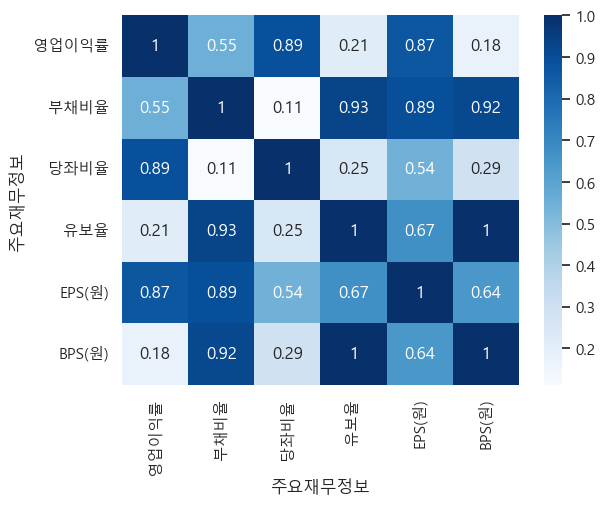

In [470]:
# 주요재무정보 내부자료에 따른 각 컬럼들과 관련된 상관관계를 파악
# 아래와 같은 결과가 도출
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
corr_matrix = year_information3.drop(year_information3[["매출액", "순이익률", "당기순이익", "ROE(지배주주)", "영업이익", "PER(배)", "PBR(배)"]], axis = 1).corr()
sns.heatmap(np.abs(corr_matrix), annot=True, cmap = "Blues")

In [471]:
year_information3

주요재무정보,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),PER(배),BPS(원),PBR(배)
2020.12 실적,8841.0,1459.0,275.0,16.51,3.11,1.10,292.07,62.79,365.06,34.0,84.53,3042.0,0.93
2021.12 실적,11538.0,2039.0,3066.0,17.67,26.57,23.91,154.25,82.66,526.59,846.0,3.12,4140.0,0.64
2022.12 실적,16120.0,2677.0,1723.0,16.61,10.69,11.21,151.68,50.19,625.35,494.0,4.40,4912.0,0.44


### 데이터 수가 적다보니 데이터 정리가 무의미한 결과 초래

In [472]:
# 데이터 추가를 위해 공매도, 외국인 보유량, 각 일자별 시세에 해당하는 자료를 추가
df = pd.read_csv("./data/대한해운_시세.csv", encoding='euc-kr')
df_Gong = pd.read_csv("./data/대한해운_공매도.csv", encoding='euc-kr')
df_gong_2021 = pd.read_csv("./data/대한해운_공매도2.csv", encoding='euc-kr')

In [473]:
df_gong_2023 = df_Gong[df_Gong["일자"].str.contains("2023")]
df_gong_2022 = df_Gong[df_Gong["일자"].str.contains("2022")]

In [474]:
data_2023 = df[df["일자"].str.contains("2023")]
data_2022 = df[df["일자"].str.contains("2022")]
data_2021 = df[df["일자"].str.contains("2021")]

In [475]:
df_gong_2023

,일자,공매도 수량_거래량_전체,공매도 수량_거래량_업틱룰적용,공매도 수량_거래량_업틱룰예외,공매도 수량_순보유잔고수량,공매도 금액_거래대금_전체,공매도 금액_거래대금_업틱룰적용,공매도 금액_거래대금_업틱룰예외,공매도 금액_순보유잔고금액
0,2023/12/28,12300,0,12300,146565,26537865,0,26537865,315847575
1,2023/12/27,4435,0,4435,149750,9335630,0,9335630,315223750
2,2023/12/26,14208,0,14208,151750,29793585,0,29793585,318675000
3,2023/12/22,2104,0,2104,151750,4386980,0,4386980,323227500
4,2023/12/21,13029,0,13029,147750,27443725,0,27443725,305103750
...,...,...,...,...,...,...,...,...,...
240,2023/01/06,10055,0,10055,122997,20582560,0,20582560,253373820
241,2023/01/05,10164,0,10164,128921,20400270,0,20400270,259775815
242,2023/01/04,3373,0,3373,112734,6813460,0,6813460,227722680
243,2023/01/03,28436,0,28436,98196,57610015,0,57610015,198355920


In [476]:
data_2023

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2023/12/28,2155,50,2.38,2110,2180,2100,1646787,3550529380,687827426300,319177460
1,2023/12/27,2105,5,0.24,2065,2120,2050,1240367,2582132150,671868553300,319177460
2,2023/12/26,2100,-30,-1.41,2135,2145,2050,2552597,5320082120,670272666000,319177460
3,2023/12/22,2130,65,3.15,2070,2165,2050,2566929,5453935325,679847989800,319177460
4,2023/12/21,2065,-105,-4.84,2205,2250,2060,6105382,13087939980,659101454900,319177460
...,...,...,...,...,...,...,...,...,...,...,...
240,2023/01/06,2060,45,2.23,2000,2080,2000,681611,1394338595,657505567600,319177460
241,2023/01/05,2015,-5,-0.25,2030,2040,2000,483571,973471315,643142581900,319177460
242,2023/01/04,2020,0,0.00,1995,2035,1980,601749,1213952615,644738469200,319177460
243,2023/01/03,2020,-85,-4.04,2065,2105,1985,1256151,2545586560,644738469200,319177460


In [477]:
data_2023_clear = pd.merge(data_2023, df_gong_2023)
data_2022_clear = pd.merge(data_2022, df_gong_2022)
data_2021_clear = pd.merge(data_2021, df_gong_2021)

In [478]:
data_2023_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   일자                 245 non-null    object 
 1   종가                 245 non-null    int64  
 2   대비                 245 non-null    int64  
 3   등락률                245 non-null    float64
 4   시가                 245 non-null    int64  
 5   고가                 245 non-null    int64  
 6   저가                 245 non-null    int64  
 7   거래량                245 non-null    int64  
 8   거래대금               245 non-null    int64  
 9   시가총액               245 non-null    int64  
 10  상장주식수              245 non-null    int64  
 11  공매도 수량_거래량_전체      245 non-null    int64  
 12  공매도 수량_거래량_업틱룰적용   245 non-null    int64  
 13  공매도 수량_거래량_업틱룰예외   245 non-null    int64  
 14  공매도 수량_순보유잔고수량     245 non-null    int64  
 15  공매도 금액_거래대금_전체     245 non-null    int64  
 16  공매도 금액_거래대금_업틱룰적용  245 non

<Axes: >

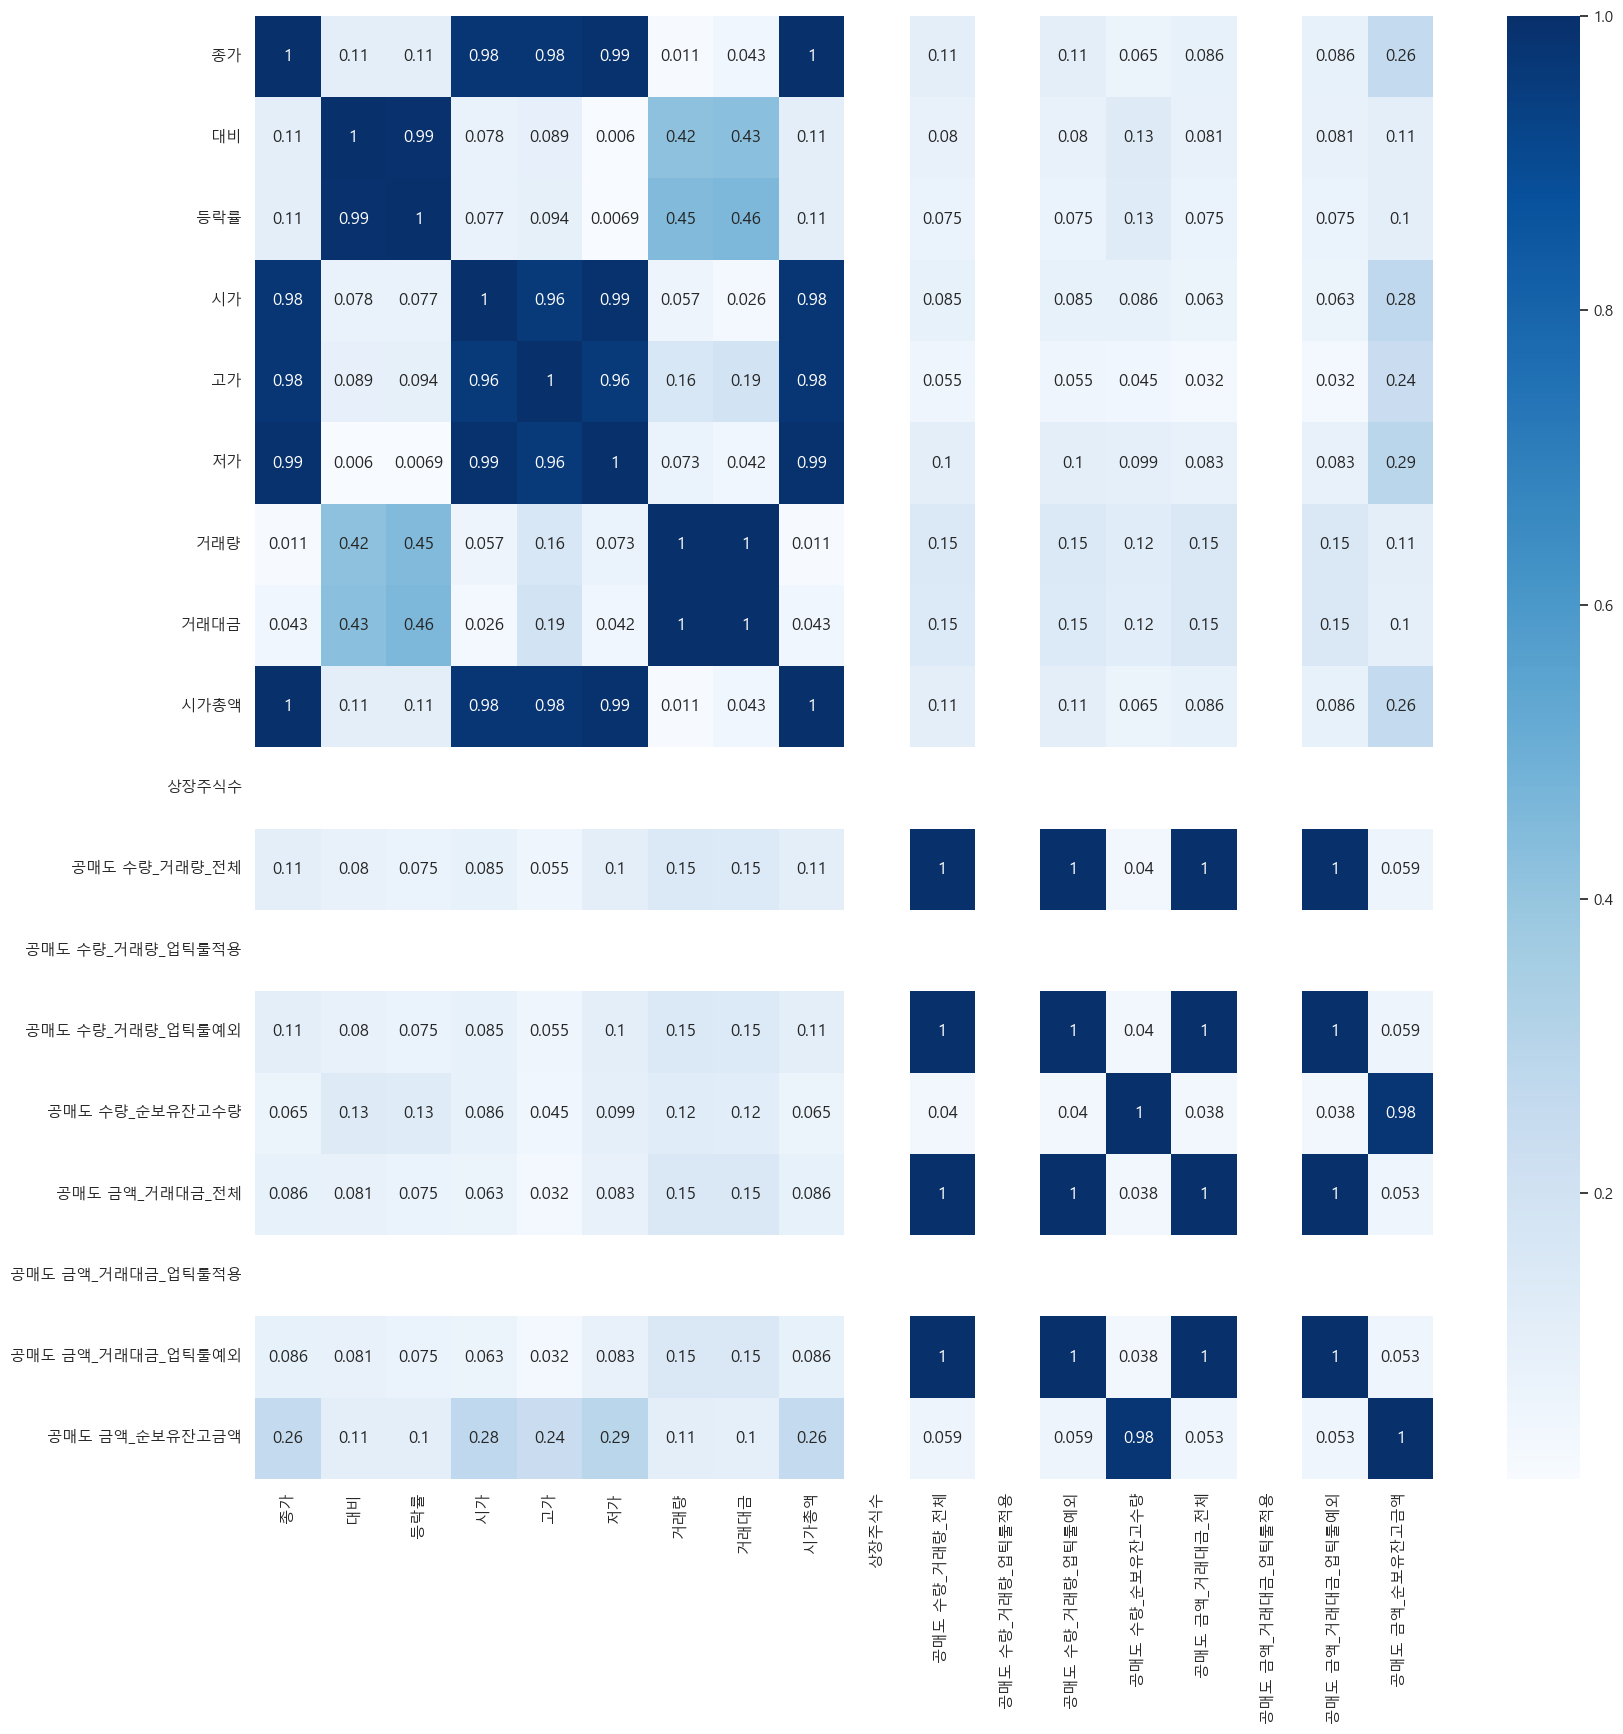

In [479]:
# (공매도, 시세 데이터가 포함된) 데이터를 추가한 상관관계 
plt.figure(figsize=(19,19))

plt.rc("font", family = "Malgun Gothic")

sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
corr_matrix = data_2023_clear.drop("일자", axis = 1).corr()
sns.heatmap(np.abs(corr_matrix), annot=True, cmap = "Blues")

In [480]:
data_2023_clear.columns

Index(['일자', '종가', '대비', '등락률', '시가', '고가', '저가', '거래량', '거래대금', '시가총액',
       '상장주식수', '공매도 수량_거래량_전체', '공매도 수량_거래량_업틱룰적용', '공매도 수량_거래량_업틱룰예외',
       '공매도 수량_순보유잔고수량', '공매도 금액_거래대금_전체', '공매도 금액_거래대금_업틱룰적용',
       '공매도 금액_거래대금_업틱룰예외', '공매도 금액_순보유잔고금액'],
      dtype='object')

In [481]:
data_2023_clear

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,공매도 수량_거래량_전체,공매도 수량_거래량_업틱룰적용,공매도 수량_거래량_업틱룰예외,공매도 수량_순보유잔고수량,공매도 금액_거래대금_전체,공매도 금액_거래대금_업틱룰적용,공매도 금액_거래대금_업틱룰예외,공매도 금액_순보유잔고금액
0,2023/12/28,2155,50,2.38,2110,2180,2100,1646787,3550529380,687827426300,319177460,12300,0,12300,146565,26537865,0,26537865,315847575
1,2023/12/27,2105,5,0.24,2065,2120,2050,1240367,2582132150,671868553300,319177460,4435,0,4435,149750,9335630,0,9335630,315223750
2,2023/12/26,2100,-30,-1.41,2135,2145,2050,2552597,5320082120,670272666000,319177460,14208,0,14208,151750,29793585,0,29793585,318675000
3,2023/12/22,2130,65,3.15,2070,2165,2050,2566929,5453935325,679847989800,319177460,2104,0,2104,151750,4386980,0,4386980,323227500
4,2023/12/21,2065,-105,-4.84,2205,2250,2060,6105382,13087939980,659101454900,319177460,13029,0,13029,147750,27443725,0,27443725,305103750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2023/01/06,2060,45,2.23,2000,2080,2000,681611,1394338595,657505567600,319177460,10055,0,10055,122997,20582560,0,20582560,253373820
241,2023/01/05,2015,-5,-0.25,2030,2040,2000,483571,973471315,643142581900,319177460,10164,0,10164,128921,20400270,0,20400270,259775815
242,2023/01/04,2020,0,0.00,1995,2035,1980,601749,1213952615,644738469200,319177460,3373,0,3373,112734,6813460,0,6813460,227722680
243,2023/01/03,2020,-85,-4.04,2065,2105,1985,1256151,2545586560,644738469200,319177460,28436,0,28436,98196,57610015,0,57610015,198355920


<Axes: >

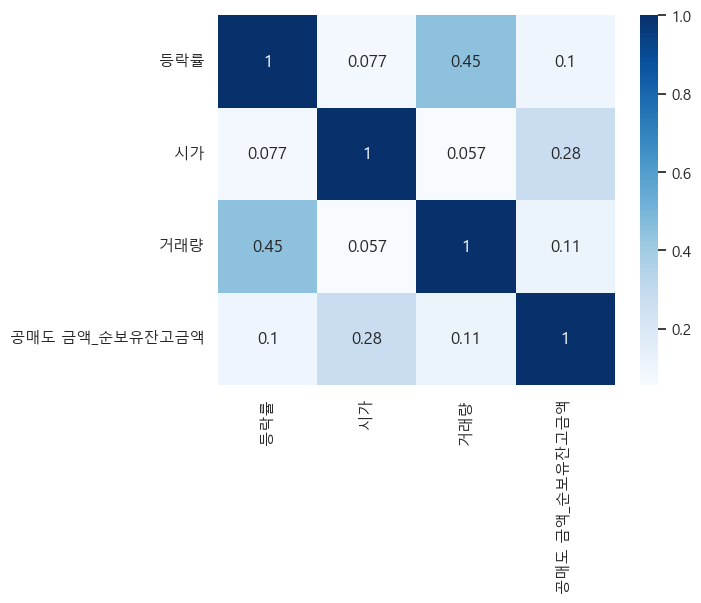

In [482]:
# 서로간의 상관관계가 너무 큰 컬럼들이 존재하여 다중공선성 위배가 발생 가능성
# 일부 컬럼 삭제
plt.rc("font", family = "Malgun Gothic")

sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
corr_matrix = data_2023_clear.drop(data_2023_clear[["일자", "대비", "종가", "고가", "저가", '공매도 수량_순보유잔고수량', "공매도 수량_거래량_업틱룰적용", "공매도 금액_거래대금_업틱룰적용", "상장주식수", "시가총액", "거래대금", "공매도 수량_거래량_전체", "공매도 수량_거래량_업틱룰예외", "공매도 금액_거래대금_전체", "공매도 금액_거래대금_업틱룰예외"]], axis = 1).corr()
sns.heatmap(np.abs(corr_matrix), annot=True, cmap = "Blues")

# 30 영업일 이후 시가 예측

In [483]:
info_2023 = data_2023_clear.drop(data_2023_clear[["대비", "종가", "고가", "저가", '공매도 수량_순보유잔고수량', "공매도 수량_거래량_업틱룰적용", "공매도 금액_거래대금_업틱룰적용", "상장주식수", "시가총액", "거래대금", "공매도 수량_거래량_전체", "공매도 수량_거래량_업틱룰예외", "공매도 금액_거래대금_전체", "공매도 금액_거래대금_업틱룰예외"]], axis = 1)
info_2022 = data_2022_clear.drop(data_2022_clear[["대비", "종가", "고가", "저가", '공매도 수량_순보유잔고수량', "공매도 수량_거래량_업틱룰적용", "공매도 금액_거래대금_업틱룰적용", "상장주식수", "시가총액", "거래대금", "공매도 수량_거래량_전체", "공매도 수량_거래량_업틱룰예외", "공매도 금액_거래대금_전체", "공매도 금액_거래대금_업틱룰예외"]], axis = 1)
info_2021 = data_2021_clear.drop(data_2021_clear[["대비", "종가", "고가", "저가", '공매도 수량_순보유잔고수량', "공매도 수량_거래량_업틱룰적용", "공매도 금액_거래대금_업틱룰적용", "상장주식수", "시가총액", "거래대금", "공매도 수량_거래량_전체", "공매도 수량_거래량_업틱룰예외", "공매도 금액_거래대금_전체", "공매도 금액_거래대금_업틱룰예외"]], axis = 1)

- 컬럼 제거 이유
    - 종가, 고가, 저가 시가, 시가총액이 비교적 높은 연관성을 보여 시가로 통일
    - 대비와 등락률이 높은 연관성을 가지게 되어 등락률로 통일 
    - 공매도 관련 정보들은 서로 높은 연관성을 가져 공매도 금액_순보유잔고금액 으로 통일
    - 거래대금과 거래량은 높은 연관성을 가져 거래량으로 통일
    
- 연말 데이터나 분기별을 짤라서 예측을 하려고 했는데, 가져온 데이터의 마지막이 23.12.31인데 이때 기준으로 분기 결과가 없기 때문에 결과를 확인하기 위해서는 1.5개월로 줄임(3월 데이터는 없으므로 수집이 어려웠기 때문에)

In [484]:
dict_info = year_information3.drop(year_information3[["매출액", "순이익률", "당기순이익", "ROE(지배주주)", "영업이익", "PER(배)", "PBR(배)"]], axis = 1).to_dict("records")

In [485]:
# 2020년 실적
for i in dict_info[2]:
    info_2021[i] = dict_info[2][i]
    
# 2021년 실적
for i in dict_info[2]:
    info_2022[i] = dict_info[2][i]


# 2022년 실적
for i in dict_info[2]:
    info_2023[i] = dict_info[2][i]

In [486]:
info_2021

,일자,등락률,시가,거래량,공매도 금액_순보유잔고금액,영업이익률,부채비율,당좌비율,유보율,EPS(원),BPS(원)
0,2021/12/30,-0.94,2685,866345,918458640,16.61,151.68,50.19,625.35,494.0,4912.0
1,2021/12/29,3.09,2600,1866256,929890455,16.61,151.68,50.19,625.35,494.0,4912.0
2,2021/12/28,0.58,2570,933838,901407595,16.61,151.68,50.19,625.35,494.0,4912.0
3,2021/12/27,0.39,2560,826594,867359580,16.61,151.68,50.19,625.35,494.0,4912.0
4,2021/12/24,0.00,2565,776000,861145600,16.61,151.68,50.19,625.35,494.0,4912.0
...,...,...,...,...,...,...,...,...,...,...,...
243,2021/01/08,-3.79,3476,14481992,1434549150,16.61,151.68,50.19,625.35,494.0,4912.0
244,2021/01/07,-1.20,3532,74529716,1606689460,16.61,151.68,50.19,625.35,494.0,4912.0
245,2021/01/06,-2.35,3518,34600682,1498722720,16.61,151.68,50.19,625.35,494.0,4912.0
246,2021/01/05,20.63,2954,205485491,1534788240,16.61,151.68,50.19,625.35,494.0,4912.0


In [487]:
total = pd.concat([info_2021, info_2022, info_2023], axis = 0).sort_values('일자').reset_index(drop=True)

In [1]:
# 컬럼을 한 번 제거하고 위의 재무정보랑 합친 데이터
total.head(31)

In [489]:
# 시가를 뽑은 이유도 전날의 종가가 되기 때문에 별 차이가 없다고 판단되었음
price = list(total["시가"][30:])

In [490]:
ddd = pd.read_csv("./data/대한해운_시세2.csv", encoding='euc-kr')

In [491]:
for i in ddd["시가"][:30]:
    price.append(i)

In [492]:
total["price"] = price

In [493]:
foreign = pd.read_csv("./data/대한해운_외국인.csv", encoding='euc-kr')
foreign2 = pd.read_csv("./data/대한해운_외국인2.csv", encoding='euc-kr')

In [494]:
# 외국인 지분율 데이터 추가
total["외국인 지분율"] = pd.concat([foreign, foreign2]).sort_values("일자").reset_index(drop = True)["외국인 지분율"]

In [495]:
total

,일자,등락률,시가,거래량,공매도 금액_순보유잔고금액,영업이익률,부채비율,당좌비율,유보율,EPS(원),BPS(원),price,외국인 지분율
0,2021/01/04,4.44,2903,22083931,1253772575,16.61,151.68,50.19,625.35,494.0,4912.0,3122,4.28
1,2021/01/05,20.63,2954,205485491,1534788240,16.61,151.68,50.19,625.35,494.0,4912.0,3182,4.36
2,2021/01/06,-2.35,3518,34600682,1498722720,16.61,151.68,50.19,625.35,494.0,4912.0,3108,4.47
3,2021/01/07,-1.20,3532,74529716,1606689460,16.61,151.68,50.19,625.35,494.0,4912.0,3154,4.16
4,2021/01/08,-3.79,3476,14481992,1434549150,16.61,151.68,50.19,625.35,494.0,4912.0,3280,4.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2023/12/21,-4.84,2205,6105382,305103750,16.61,151.68,50.19,625.35,494.0,4912.0,2365,5.67
735,2023/12/22,3.15,2070,2566929,323227500,16.61,151.68,50.19,625.35,494.0,4912.0,2520,5.50
736,2023/12/26,-1.41,2135,2552597,318675000,16.61,151.68,50.19,625.35,494.0,4912.0,2590,5.62
737,2023/12/27,0.24,2065,1240367,315223750,16.61,151.68,50.19,625.35,494.0,4912.0,2750,5.60


<Axes: >

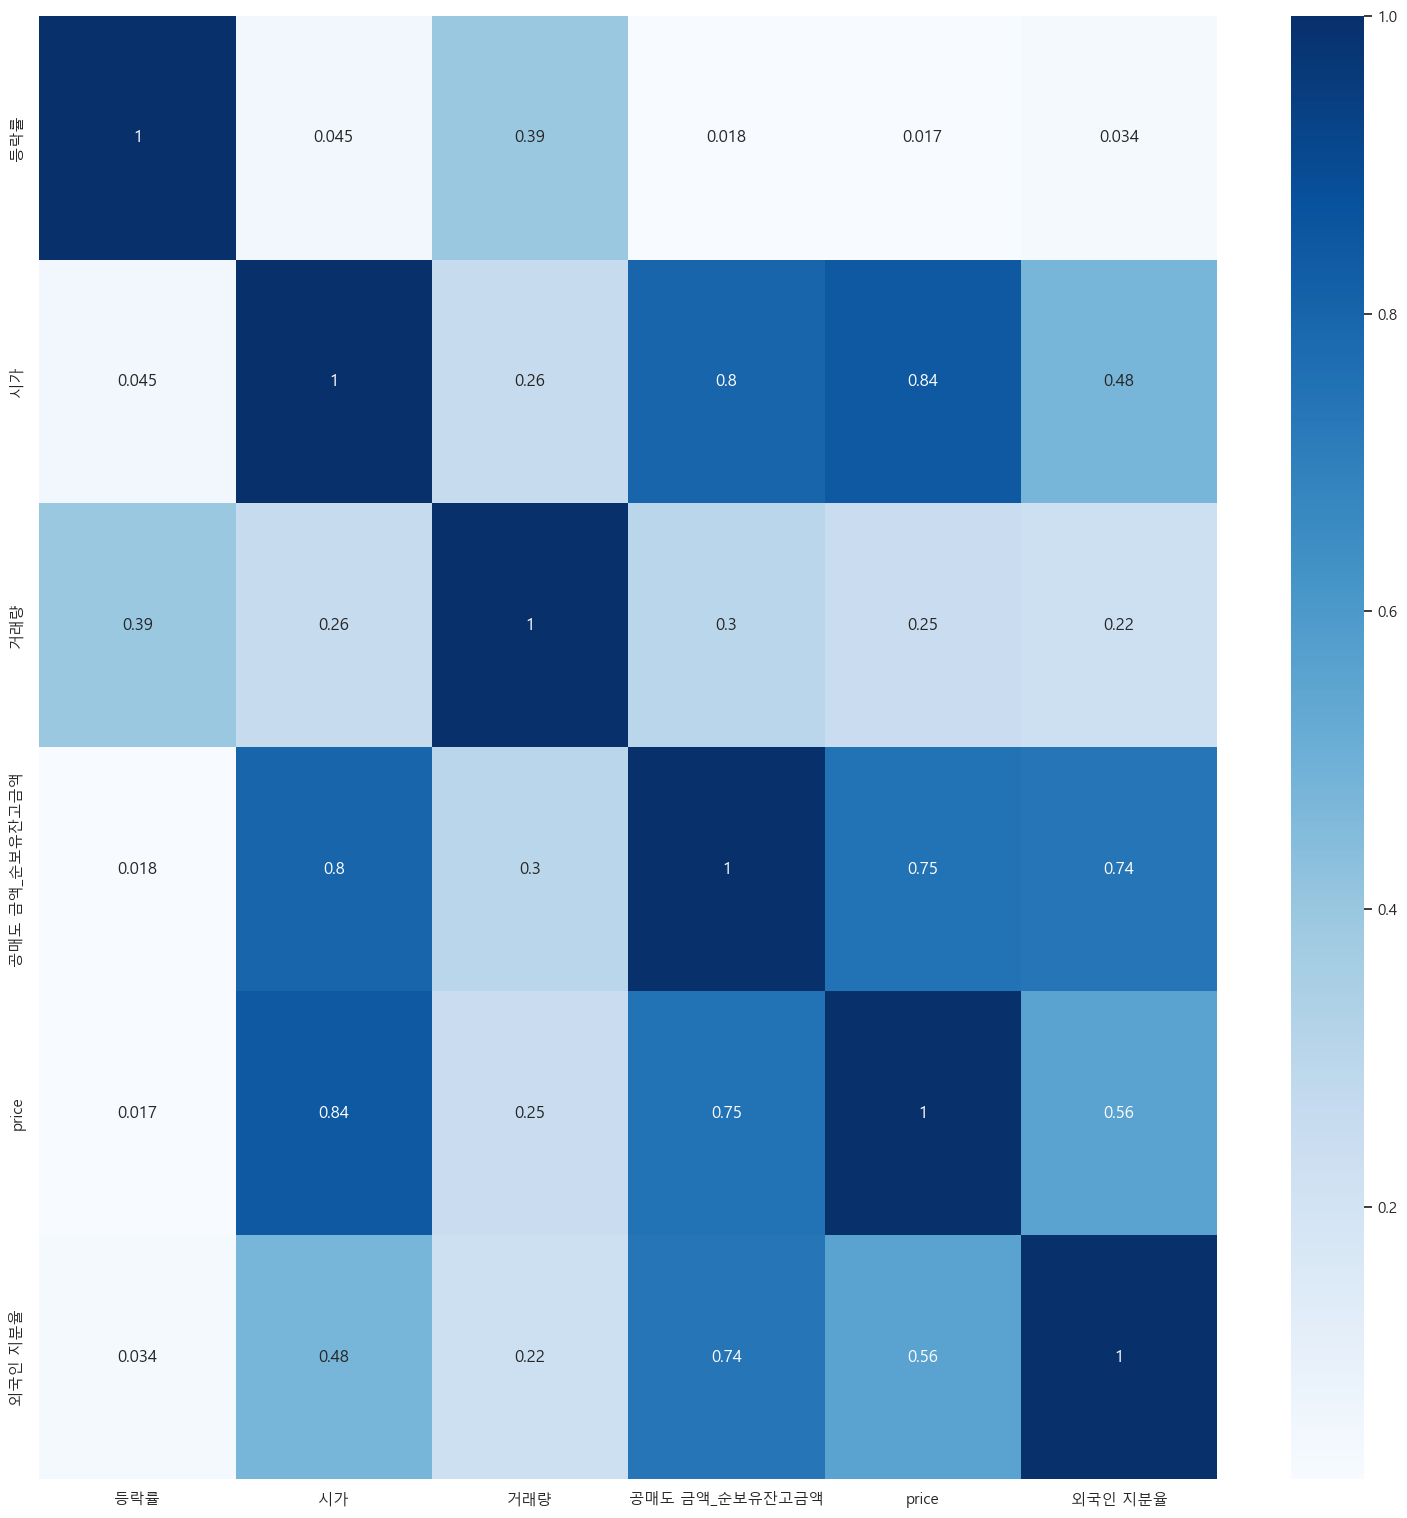

In [496]:
# 외국인 지분율까지 추가한 데이터의 상관관계
plt.figure(figsize=(19,19))

plt.rc("font", family = "Malgun Gothic")

sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
corr_matrix = total.drop(["일자", "영업이익률", "부채비율", "당좌비율", "유보율", "EPS(원)", "BPS(원)"], axis = 1).corr()
sns.heatmap(np.abs(corr_matrix), annot=True, cmap = "Blues")

# 예측모델

- 위의 예측모델을 통해 예측모델을 돌린 것

In [497]:
x = total.drop(["일자", "price"], axis = 1)
y = total["price"]

In [498]:
# 선형회귀 및 가우시안, 로지스틱, KNR, 랜덤포레스트 5개의 예측모델을 실행

lr = LinearRegression()
knr = KNeighborsRegressor()
logi = LogisticRegression()
rf = RandomForestClassifier(n_jobs = -1, random_state = 7)
gpr = GaussianProcessRegressor()

# 편차가 큰 범위를 측정할 때 좋기 때문에 minmax 스케일러 사용
ss = StandardScaler()
mm = MinMaxScaler()
rs = RobustScaler()
scaled_x = mm.fit_transform(x)

In [499]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2, random_state = 0)

In [500]:
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))
y_pred= lr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
np.sqrt(MSE)

0.7457523211159771
0.7371593465252968


257.3285306979298

In [501]:
gpr.fit(x_train, y_train)
print(gpr.score(x_train, y_train))
print(gpr.score(x_test, y_test))
y_pred= gpr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)

0.9545219339630002
-428.1860454164714


10398.350867000894

In [502]:
logi.fit(x_train, y_train)
print(logi.score(x_train, y_train))
print(logi.score(x_test, y_test))
y_pred= logi.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)

0.028764805414551606
0.0


368.5581658593683

In [503]:
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))
y_pred= rf.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)

1.0
0.006756756756756757


195.81850049251

In [504]:
# knr 예측모델의 score 및 편차의 결과가 가장 좋게 나왔음을 확인

knr.fit(x_train, y_train)
print(knr.score(x_train, y_train))
print(knr.score(x_test, y_test))
y_pred= knr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)

0.9281883858881179
0.8924673590776209


164.59317660153405

In [505]:
#교차검증 진행
# knr이 가장 유의미한 데이터가 맞는지 교차검증을 실시
scores = cross_validate(knr, x_train, y_train, return_train_score = True, n_jobs = -1)
print(scores["test_score"])
print(np.mean(scores["test_score"]))

[0.87789199 0.88375907 0.87247821 0.89712312 0.87890708]
0.8820318943877092


- 최근접이웃 모델이 가장 성능이 뛰어난 것을 확인할 수 있음

# 데이터 시각화

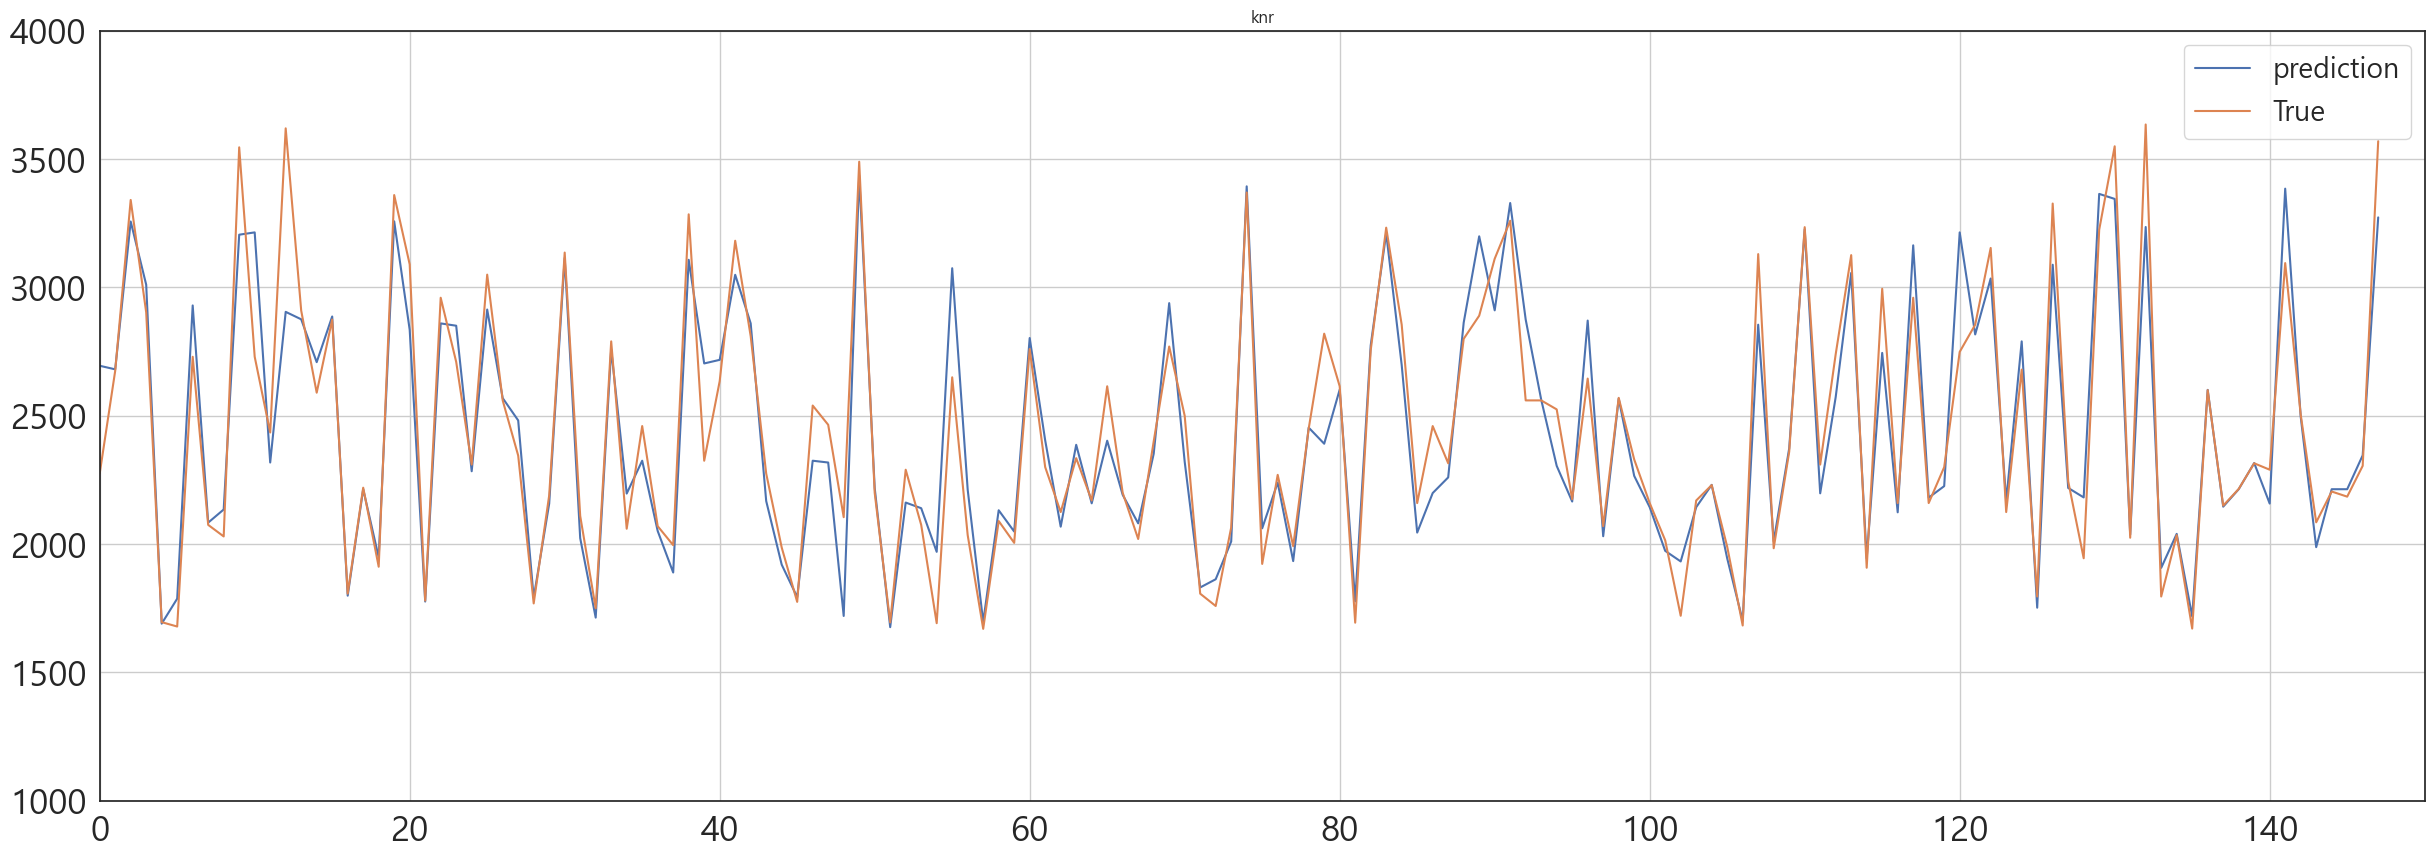

In [506]:
# 가장 뛰어난 모델에 대해 test데이터 시각화
# 결과값이랑 예측값이랑 그래프 제작(비교적 잘 따라가는 모습)

x_axis = np.arange(0, len(y_test))

plt.figure(figsize = (30,10))
plt.ylim(1000, 4000)
plt.xlim(0, 150)
plt.title("knr")
plt.plot(x_axis ,y_pred, label = "prediction")
plt.plot(x_axis, y_test, label = "True") 
plt.legend(fontsize = 20)
plt.tick_params(axis = "x",labelsize = 25)
plt.tick_params(axis = "y",labelsize = 25)
plt.grid(True)

plt.show()

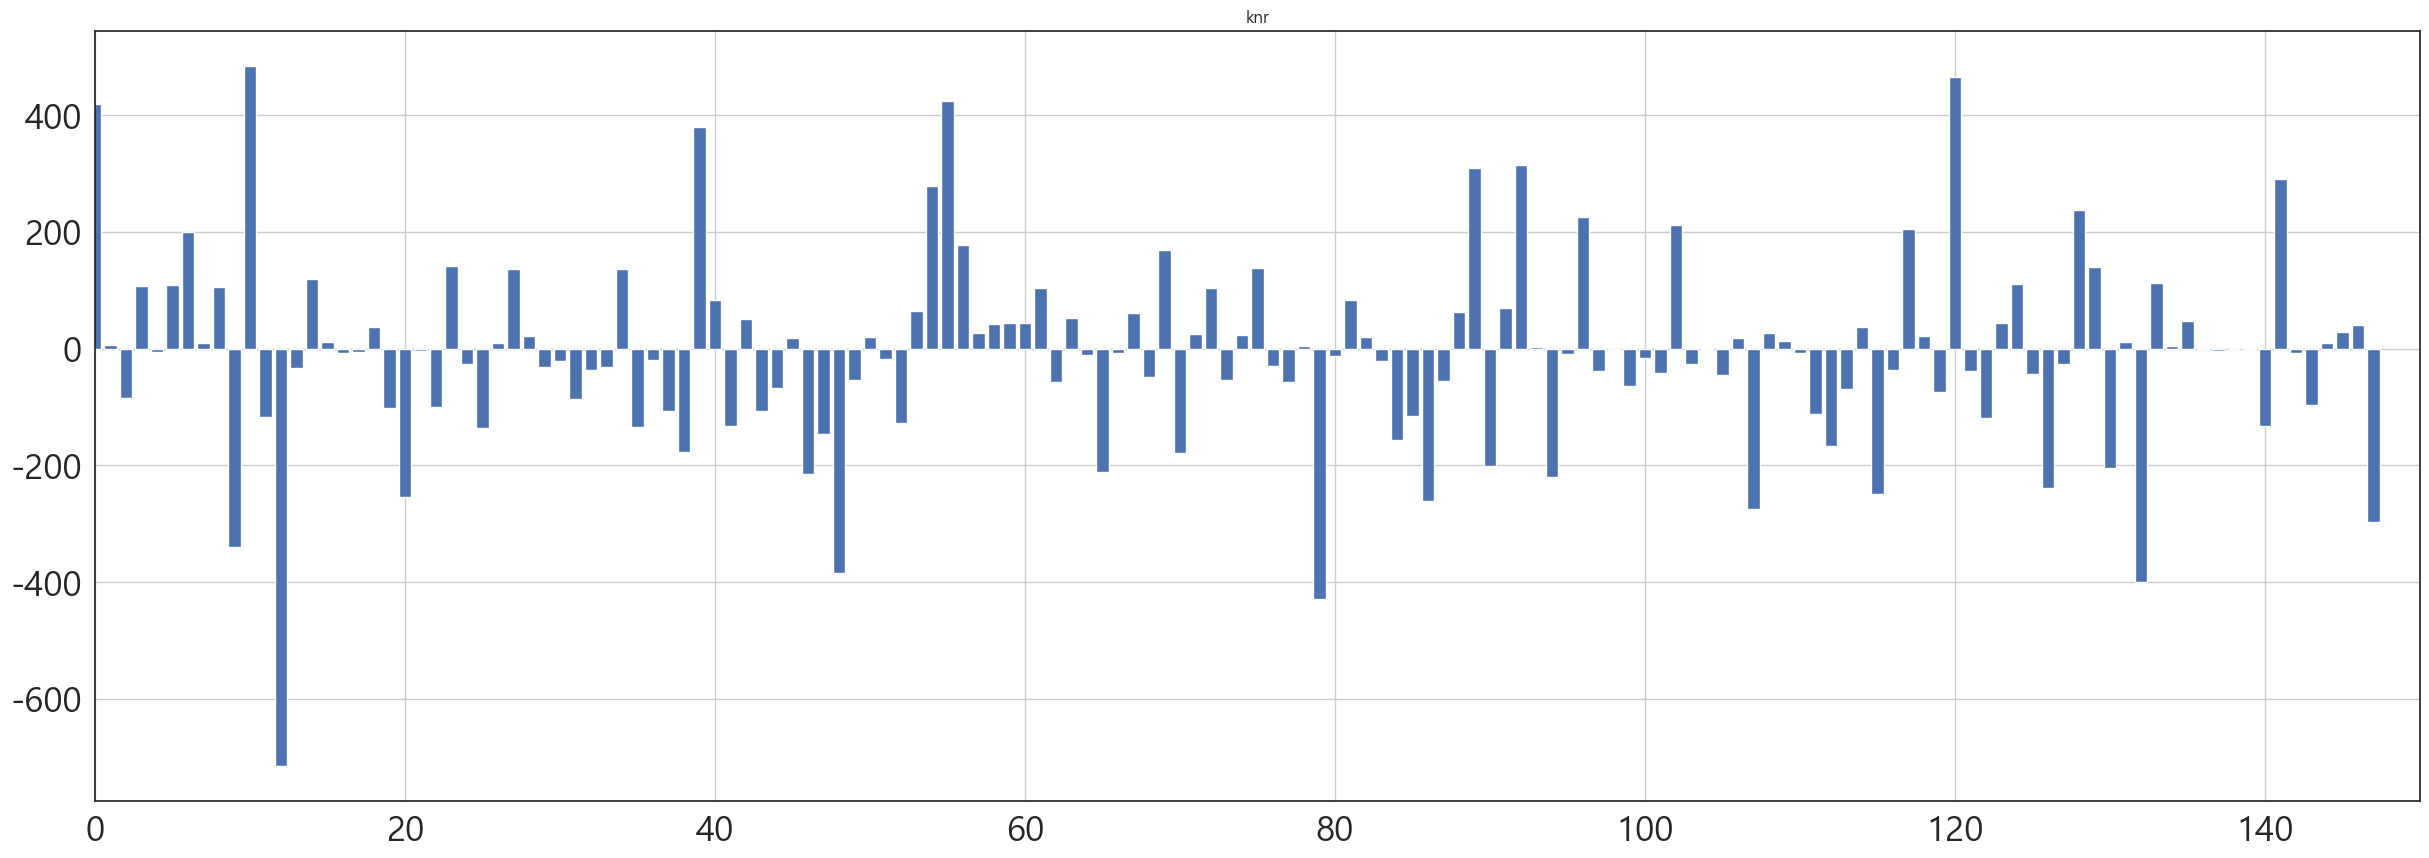

In [507]:
# 테스트 답안과 예측 답안의 차이를 바그래프로 표현(예측값과 실제값의 차이 그래프화)

plt.figure(figsize = (30,10))

plt.xlim(0, 150)
plt.title("knr")
plt.bar(x_axis, y_pred - y_test)

plt.tick_params(axis = "x",labelsize = 25)
plt.tick_params(axis = "y",labelsize = 25)
plt.grid(True)

plt.show()

### 유의미한 결과를 도출함.

# 과연 연말 데이터가 필요할까?(가정)

In [508]:
# 일자별로 시가를 예측하는 코드를 작성하였는데, 처음 예상했던 주요재무정보가 이 예측한 유의미한 결과를 가져올지 가정을 세움
# 이후 주요재무정보 데이터를 제거하고 회귀를 돌렸는데 같은 결과가 나옴
total2 = total.drop(["일자","영업이익률", "부채비율", "당좌비율", "유보율", "EPS(원)", "BPS(원)"], axis = 1)
x_2 = total2.drop("price", axis = 1)
y_2 = total2["price"]
scaled_x_2 = mm.fit_transform(x_2)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(scaled_x_2, y_2, test_size = 0.2, random_state = 0)

In [509]:
knr.fit(x_train_2, y_train_2)
print(knr.score(x_train_2, y_train_2))
print(knr.score(x_test_2, y_test_2))
y_pred_2 = knr.predict(x_test_2)
MSE_2 = mean_squared_error(y_test_2, y_pred_2) 
np.sqrt(MSE_2)

0.9281883858881179
0.8924673590776209


164.59317660153405

In [510]:
# 이 컬럼들이 유의미한 결과를 도출할 수 있다

x_2.columns

Index(['등락률', '시가', '거래량', '공매도 금액_순보유잔고금액', '외국인 지분율'], dtype='object')

<Axes: >

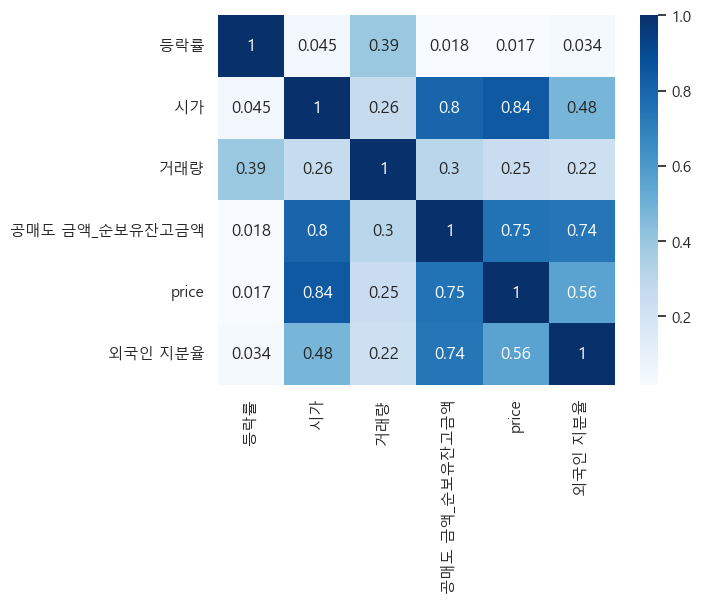

In [511]:
# 각 컬럼의 상관관계는 이렇고 30 영업일 이후에 시가를 예측하는데 큰 영향을 미치는 것을 알 수 있다
plt.rc("font", family = "Malgun Gothic")

sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
corr_matrix = total2.corr()
sns.heatmap(np.abs(corr_matrix), annot=True, cmap = "Blues")

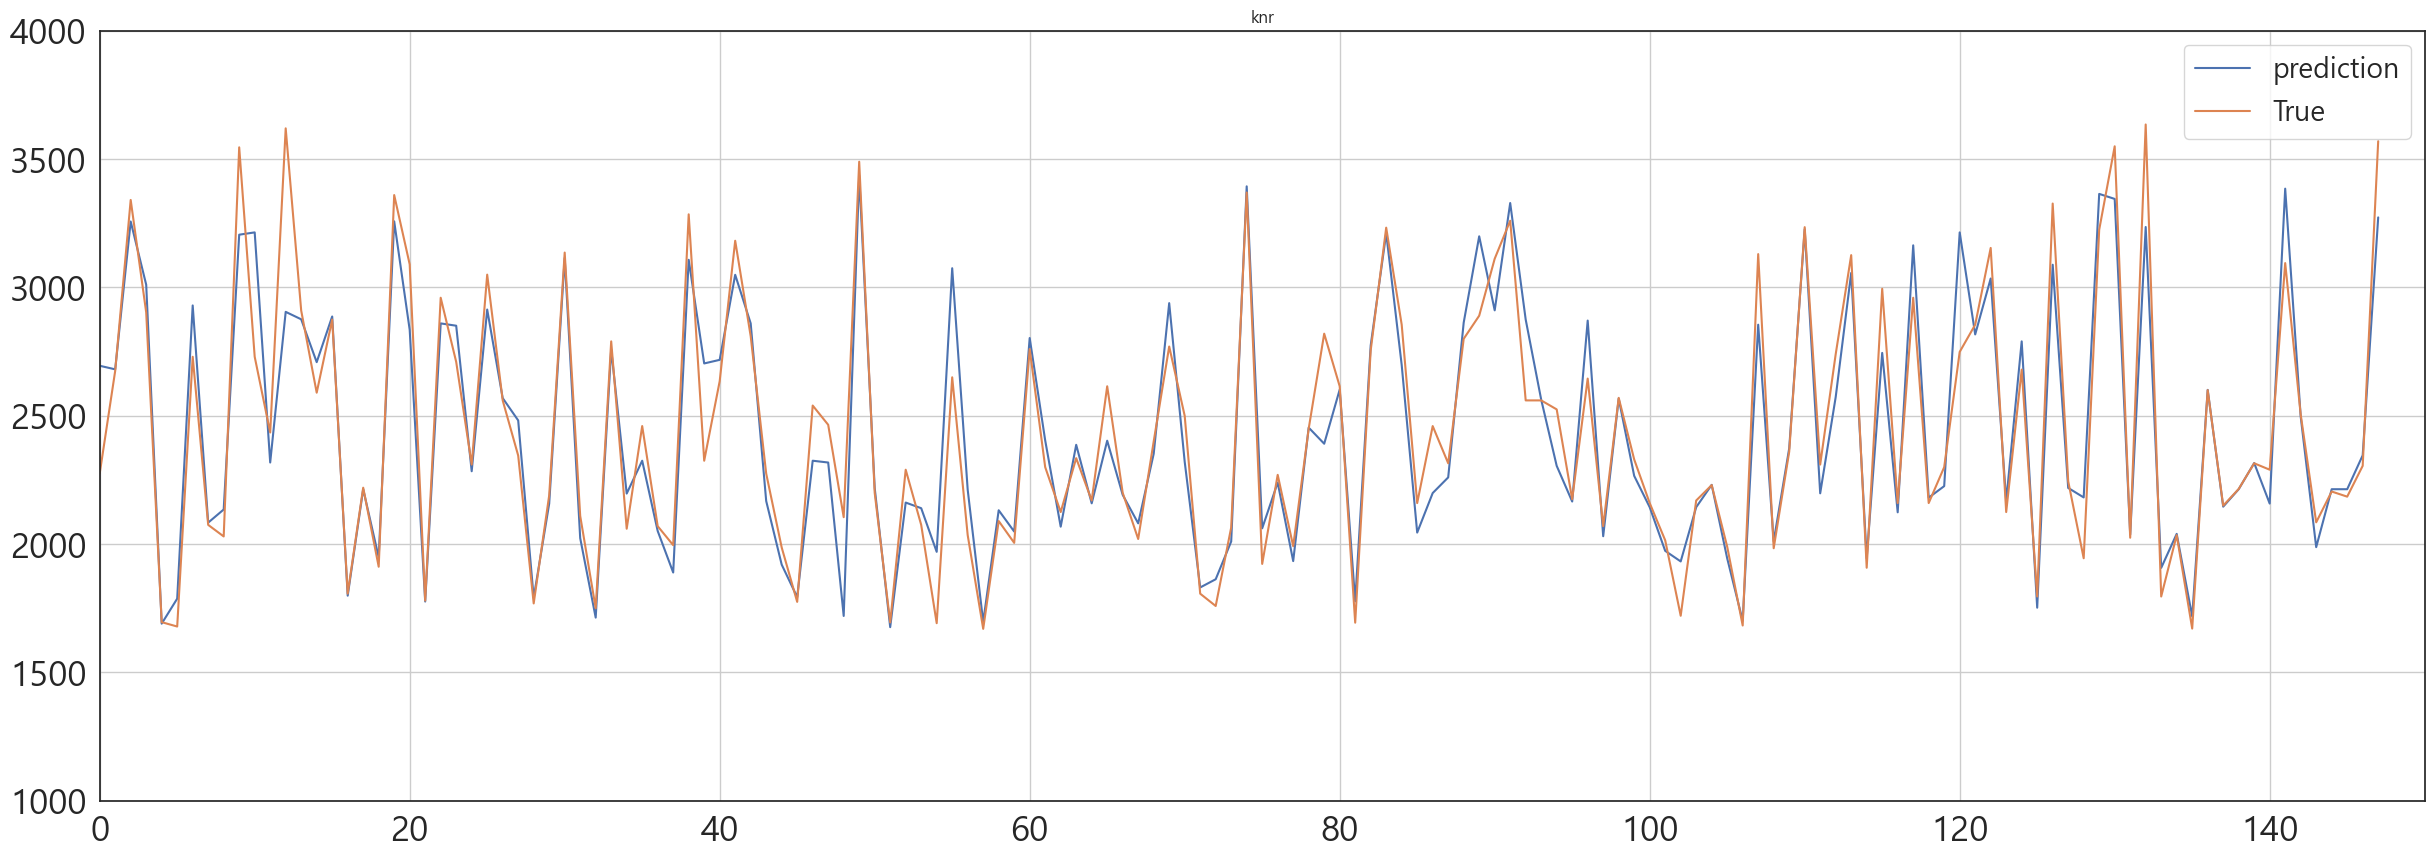

In [512]:
# test데이터 시각화
# 따라서 처음 데이터인 주요재무정보가 결과에는 유의미한 영향을 주지 않는다는 결론을 도출하였다
x_axis_2 = np.arange(0, len(y_test_2))

plt.figure(figsize = (30,10))
plt.ylim(1000, 4000)
plt.xlim(0, 150)
plt.title("knr")
plt.plot(x_axis_2 ,y_pred_2, label = "prediction")
plt.plot(x_axis_2, y_test_2, label = "True") 
plt.legend(fontsize = 20)
plt.tick_params(axis = "x",labelsize = 25)
plt.tick_params(axis = "y",labelsize = 25)
plt.grid(True)

plt.show()

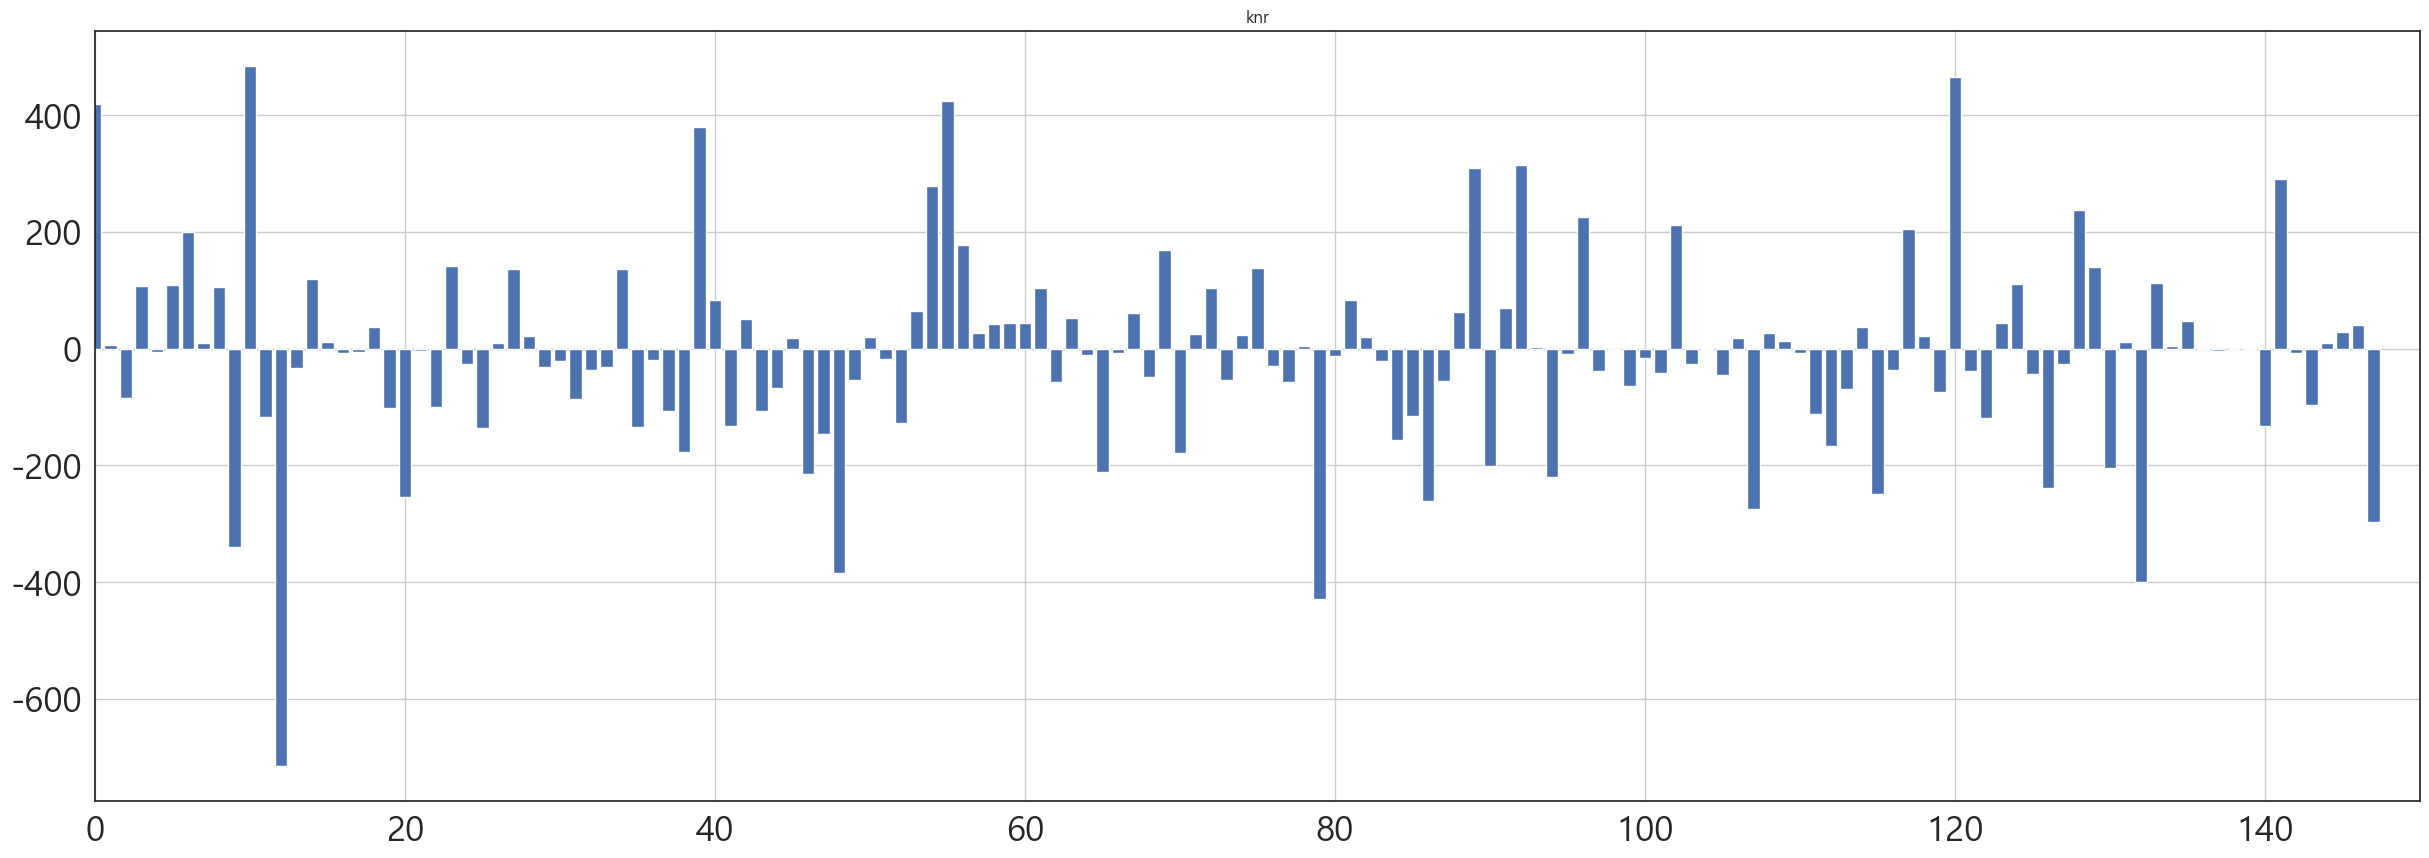

In [513]:
# 테스트 답안과 예측 답안의 차이를 바그래프로 표현

plt.figure(figsize = (30,10))

plt.xlim(0, 150)
plt.title("knr")
plt.bar(x_axis_2, y_pred_2 - y_test_2)

plt.tick_params(axis = "x",labelsize = 25)
plt.tick_params(axis = "y",labelsize = 25)
plt.grid(True)

plt.show()

# 예측값 - 실제값의 차이 바 그래프

- 연간데이터가 없어도 같은 결과를 예측하는 것을 볼 수 있음

# 상승 하락으로 맞춰보기

In [514]:
# 위에는 가격을 예측, 30 영업일 이후에 지금의 시가보다 높은 시가로 시작을 할 것인지, 낮은 시가로 시작을 할 것인지 예측하는 회귀
up_down = []
for i in total2.index:
    if total2["시가"][i] < total2["price"][i]:
        up_down.append(1)
    else:
        up_down.append(0)

In [515]:
total2

,등락률,시가,거래량,공매도 금액_순보유잔고금액,price,외국인 지분율
0,4.44,2903,22083931,1253772575,3122,4.28
1,20.63,2954,205485491,1534788240,3182,4.36
2,-2.35,3518,34600682,1498722720,3108,4.47
3,-1.20,3532,74529716,1606689460,3154,4.16
4,-3.79,3476,14481992,1434549150,3280,4.04
...,...,...,...,...,...,...
734,-4.84,2205,6105382,305103750,2365,5.67
735,3.15,2070,2566929,323227500,2520,5.50
736,-1.41,2135,2552597,318675000,2590,5.62
737,0.24,2065,1240367,315223750,2750,5.60


In [516]:
total2["up_down"] = up_down

In [517]:
x_2 = total2.drop(["price","up_down"], axis = 1)
y_2 = total2["up_down"]
scaled_x_2 = mm.fit_transform(x_2)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(scaled_x_2, y_2, test_size = 0.2, random_state = 0)

In [518]:
knr.fit(x_train_2, y_train_2)
print(knr.score(x_train_2, y_train_2))
print(knr.score(x_test_2, y_test_2))
y_pred_2 = knr.predict(x_test_2)
print(len(y_test), (y_test_2 == y_pred_2).sum())

0.613179405649994
0.35996871945259024
148 67


In [519]:
logi.fit(x_train_2, y_train_2)
print(logi.score(x_train_2, y_train_2))
print(logi.score(x_test_2, y_test_2))
y_pred_2 = logi.predict(x_test_2)
print(len(y_test), (y_test_2 == y_pred_2).sum())

0.6345177664974619
0.6013513513513513
148 89


In [520]:
gpr.fit(x_train_2, y_train_2)
print(gpr.score(x_train_2, y_train_2))
print(gpr.score(x_test_2, y_test_2))
y_pred_2 = gpr.predict(x_test_2)
print(len(y_test), (y_test_2 == y_pred_2).sum())

0.7120106778476725
-6352.974368521855
148 0


In [521]:
# 이 예측모델은 knr보다 랜덤포레스트가 더 유의미한 결과를 도출하였다
rf.fit(x_train_2, y_train_2)
print(rf.score(x_train_2, y_train_2))
print(rf.score(x_test_2, y_test_2))
y_pred_2 = rf.predict(x_test_2)
print(len(y_test), (y_test_2 == y_pred_2).sum())

1.0
0.8378378378378378
148 124


In [522]:
y_pred_2

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

# 평가

- X일 기준 당일의 등락률, 시가, 거래량, 공매도 보유량, 외국인 지분율로 30 영업일 이후의 시가(29 영업일 이후의 종가)를 예측할 수 있었음
- 30영업일 이후의 시가를 맞추기 위한 다양한 모델 중 K근접 이웃이 다른 회사의 주가예측에도 유의미하다고 할 수 있음
- 상승과 하락을 맞추기 위해서는 랜덤포레스트의 정답률이 높은 편이므로 두가지를 골고루 이용할 경우 높은 확률로 금액을 벌 수 있을 것으로 예상됨

# 느낀 점
- 도출했던 의미가 있는 컬럼들 토대로 데이터 분석을 했을 때 다른 종목들도 마찬가지로(상장한 지 얼마 안되서 2021년 상반기 이후의 데이터만 존재하는 흥아해운만 70% -> 데이터가 부족했음에도 꽤 높은 예측 수치가 나왔다) 80% 이상의 유의미한 결과가 도출되었다